# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [18]:
!pip freeze

absl-py==0.9.0
altair==1.2.1
asn1crypto==0.22.0
astor==0.8.1
atari-py==0.1.7
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.6
av==0.3.3
awscli==1.16.17
backcall==0.1.0
backports.functools-lru-cache==1.4
backports.weakref==1.0rc1
beautifulsoup4==4.6.0
bleach==1.5.0
blinker==1.4
bokeh==0.12.13
boto==2.48.0
boto3==1.9.7
botocore==1.12.7
Box2D==2.3.2
Box2D-kengz==2.3.3
bresenham==0.2
bz2file==0.98
cassandra-driver==3.11.0
certifi==2019.6.16
cffi==1.11.2
chardet==3.0.4
click==6.7
cloudpickle==0.2.2
colorama==0.3.9
colour==0.1.5
conda==4.6.14
cryptography==2.1.4
cycler==0.10.0
Cython==0.29.7
cytoolz==0.9.0.1
dask==0.16.1
decorator==4.0.11
defusedxml==0.5.0
dill==0.2.7.1
docopt==0.6.2
docutils==0.14
dronekit==2.9.2
entrypoints==0.2.3
et-xmlfile==1.0.1
eventlet==0.22.0
fastcache==1.0.2
Flask==0.12.2
Flask-SocketIO==2.9.2
future==0.16.0
gast==0.3.2
gensim==3.4.0
glfw==1.8.0
greenlet==0.4.12
grpcio==1.11.0
gym==0.9.6
h5py==2.7.1
heapdict==1.0.0
html2text==2018.1.9
html5lib==0.9999999
idna==2.6

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
tries = 0
print(tries)
while True and tries<1e4:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    tries = tries +1
    if tries%250==0:
        print(tries)
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

0
250
500
750
1000
Total score (averaged over agents) this episode: 0.1544999965466559


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import numpy as np
import random
import copy
from collections import namedtuple, deque
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# ME

In [7]:


BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
UPDATE_EVERY_T_TIMESTEPS = 20        # learning timestep interval
NUM_LEARNING_ROUNDS = 10          # number of learning passes
EPSILON = 1.0           # explore->exploit noise process added to act step
EPSILON_DECAY = 1e-6    # decay rate for noise process
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DDPG_ACTOR_PATH = 'DDPG_actor_WEIGHTS.pth'
DDPG_CRITIC_PATH = 'DDPG_critic_WEIGHTS.pth'

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size,
                 action_size,
                 random_seed,
                 discount_factor,
                noise_process):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.epsilon = EPSILON
        self.noise_process = noise_process
        self.discount_factor = discount_factor

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC)

        # Noise process
        
        #try uncorrelated Gaussian noise
        if noise_process == 'Gaussian':
            self.noise = GaussianNoise(action_size = action_size)
        else:
            self.noise = OUNoise(action_size, random_seed)
            
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    
    def step(self, state, action, reward, next_state, done, timestep):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn at defined interval, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE and timestep % UPDATE_EVERY_T_TIMESTEPS == 0:
            for _ in range(NUM_LEARNING_ROUNDS):
                
                #sample from replay buffer and train model LEARN_NUM times
                experiences = self.memory.sample()
                self.learn(experiences, self.discount_factor)
    
    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.epsilon * self.noise.sample()
            #action += self.noise.sample()
        return np.clip(action, -1, 1)
    
    
    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (state_t, actions, rewards, states_{t+1}, done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)      
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)        
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad() 
        #check if clipping gradients
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)
        
        self.epsilon *= 0.999#(1-EPSILON_DECAY)
        
        if self.noise.tag == 'Ornstein-Uhlenbeck':
            self.noise.reset()
        


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mean=0., theta=0.15, sigma=0.2):

        self.mean = mean * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.tag = 'Ornstein-Uhlenbeck'
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state
    
class GaussianNoise:
    
    def __init__(self,action_size,seed = None,mean= 0 , variance = 0.4):
        
        self.mean = mean
        self.size = action_size
        self.variance = variance
        self.tag = 'Gaussian'
        
    def sample(self):
        
        return np.random.normal(loc=self.mean, scale=self.variance**0.5, size=self.size)
        
        
    def reset(self):
        self.mean = 0.0

        
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [8]:
class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.bn1(self.fc1(state)))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))
    
    


class Critic(nn.Module):
    """Critic Model.
    
    Calculates V(s_t) the expected rewards from state s at time t.
    """

    def __init__(self, state_size, action_size, seed, fcs1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.bn1 = nn.BatchNorm1d(fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()
    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.relu(self.bn1(self.fcs1(state)))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [9]:
def ddpg(agent,n_episodes=300, max_timesteps=1000, 
         solved_score=30.0, consec_episodes=30, 
         print_every=1, train_mode=True): 
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int)      : max number of training episodes
        max_timesteps (int)   : max number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode
        solved_score (float)  : min average reward needed to solve enviroment
        consec_episodes (int) : number of consecutive episodes used to calculate score
        print_every (int)     : interval to display results
        actor_path (str)      : filepath to store actor network weights
        critic_path (str)     : filwpath to store critic network weights

    """
    mean_scores = []                               # list of mean scores from each episode
    min_scores = []                                # list of lowest scores from each episode
    max_scores = []                                # list of highest scores from each episode
    best_score = -np.inf
    score_variance = []                            # variance of reward recieved per episode
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        
        if agent.noise_process == 'Ornstein-Uhlenbeck':
            agent.reset()                                           #reset noise process if OU process is used
        
        start_time = time.time()
        for t in range(max_timesteps):
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
            
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done,t)             
            states = next_states
            scores += rewards        
            if np.any(dones):                                   # exit loop when episode ends
                break
                
            
        duration = time.time() - start_time
        min_scores.append(np.min(scores))             # save lowest score for a single agent
        max_scores.append(np.max(scores))             # save highest score for a single agent        
        mean_scores.append(np.mean(scores))           # save mean score for the episode
        score_variance.append(np.var(scores))         # save variance of reward per episode
                
        if i_episode % print_every == 0:
            print('\rEpisode {} \tMin: {:.1f}\tMax: {:.1f}\tMean: {:.1f}\tVariance: {:.1f}'.format(\
                  i_episode, min_scores[-1], max_scores[-1], mean_scores[-1],score_variance[-1]))
        
        # save model with highest mean score
        if train_mode and mean_scores[-1] > best_score:
            torch.save(agent.actor_local.state_dict(), DDPG_ACTOR_PATH)
            torch.save(agent.critic_local.state_dict(), DDPG_CRITIC_PATH)
                  
        if mean_scores[-1] >= solved_score and i_episode >= consec_episodes:
            print('\nEnvironment solved')            
            if train_mode:
                torch.save(agent.actor_local.state_dict(), DDPG_ACTOR_PATH)
                torch.save(agent.critic_local.state_dict(), DDPG_CRITIC_PATH)  
            break
            
    return mean_scores, score_variance

In [10]:
DDPG_agent = Agent(state_size=state_size, action_size=action_size,
                   random_seed=10,noise_process = 'Gaussian',
                  discount_factor = GAMMA )

In [11]:

mean_scores,score_variance = ddpg(agent = DDPG_agent, n_episodes=50)


Episode 1 	Min: 0.0	Max: 1.3	Mean: 0.6	Variance: 0.1
Episode 2 	Min: 0.1	Max: 1.9	Mean: 0.9	Variance: 0.3
Episode 3 	Min: 0.7	Max: 3.6	Mean: 1.7	Variance: 0.5
Episode 4 	Min: 1.0	Max: 3.4	Mean: 2.1	Variance: 0.5
Episode 5 	Min: 0.6	Max: 3.0	Mean: 1.4	Variance: 0.3
Episode 6 	Min: 0.6	Max: 2.9	Mean: 1.7	Variance: 0.4
Episode 7 	Min: 0.7	Max: 3.3	Mean: 2.1	Variance: 0.6
Episode 8 	Min: 1.3	Max: 4.1	Mean: 3.1	Variance: 0.5
Episode 9 	Min: 2.5	Max: 8.2	Mean: 4.2	Variance: 1.9
Episode 10 	Min: 1.9	Max: 6.7	Mean: 3.5	Variance: 1.6
Episode 11 	Min: 2.3	Max: 8.4	Mean: 5.2	Variance: 2.5
Episode 12 	Min: 2.1	Max: 9.1	Mean: 6.5	Variance: 3.1
Episode 13 	Min: 5.4	Max: 10.7	Mean: 8.0	Variance: 2.1
Episode 14 	Min: 3.9	Max: 15.3	Mean: 9.7	Variance: 6.5
Episode 15 	Min: 4.0	Max: 14.4	Mean: 9.8	Variance: 8.1
Episode 16 	Min: 5.9	Max: 15.7	Mean: 10.2	Variance: 7.0
Episode 17 	Min: 7.0	Max: 16.3	Mean: 11.7	Variance: 6.5
Episode 18 	Min: 8.0	Max: 17.3	Mean: 14.1	Variance: 7.0
Episode 19 	Min: 6.0	Max: 16

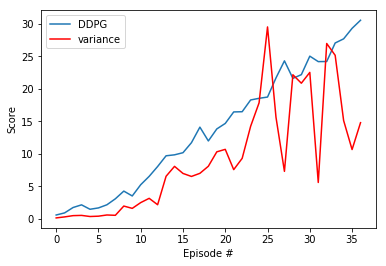

In [12]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(mean_scores)), mean_scores, label='DDPG')
plt.plot(np.arange(len(score_variance)), score_variance, c='r', label='variance')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

# A2C

In [14]:
# The implementation of A2C below is heavily based on that by qiaochen
# Please see https://github.com/qiaochen/A2C for his original implementation A2C

In [13]:


class ActorCriticNetwork(nn.Module):
    """
    The actor critic network
    The Actor and the Critic Share the same input encoder
    """
    def __init__(self, state_dim, action_dim):
        super(ActorCriticNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        
        # Actor head: output mean and std
        self.actor_fc = nn.Linear(128, 128)
        self.actor_out = nn.Linear(128, action_dim)
        
        self.std = nn.Parameter(torch.ones(1, action_dim))
        self.standard_dev_decay = 0.993
        
        # critic head: output state value
        self.critic_fc = nn.Linear(128, 128)
        self.critic_out = nn.Linear(128, 1)
        self.reset_parameters()
        
    def forward(self, state):
        """
        Compute forward pass
        Input: state tensor
        Output: tuple of (clampped action, log probabilities, state values)
        """
        x = F.relu(self.fc1(state))
        mean = self.actor_out(F.relu(self.actor_fc(x)))
        dist = torch.distributions.Normal(mean, self.std * self.standard_dev_decay )
        action = dist.sample()
        log_prob = dist.log_prob(action)
        value = self.critic_out(F.relu(self.critic_fc(x)))
        return torch.clamp(action, -3, 3)/3, log_prob, value
    
    def reset_parameters(self):
        """
        Reset parameters to the initial states
        """
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.actor_fc.weight.data.uniform_(*hidden_init(self.actor_fc))
        self.critic_fc.weight.data.uniform_(*hidden_init(self.critic_fc))
        self.actor_out.weight.data.uniform_(-3e-3, 3e-3)
        self.critic_out.weight.data.uniform_(-3e-3, 3e-3)

In [14]:

A2C_PATH = 'A2C_WEIGHTS.pth'

def A2C(solved_env_score = 30,train_mode = True):
    
    env_info = env.reset(train_mode=train_mode)[brain_name]
    
    num_agents = len(env_info.agents)

    # size of each action
    action_size = brain.vector_action_space_size

    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]

    num_episodes = 300 #1
    rollout_length = 5
    
    #Initialize A2C agent
    agent = ACAgent(state_size, 
                    action_size,
                    num_agents,
                    rollout_length=rollout_length,
                    lr=1e-4,
                    lr_decay=.95,
                    gamma=.95,
                    value_loss_weight = 1,
                    gradient_clip = 5,
                    )
    total_rewards = []                             # list of mean scores from each episode
    avg_scores = []
    max_avg_score = -1
    max_score = -1
    
    min_scores = []                                # list of lowest scores from each episode
    max_scores = []                                # list of highest scores from each episode
    best_score = -np.inf
    score_variance = []                            # variance of reward recieved per episode
    
    
    worsen_tolerance = 10  # for early-stopping training if consistently worsen for # episodes
    rollout = []
    for i_episode in range(1, num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]                       # reset the environment
        states = env_info.vector_observations                                   # get the current state
        scores = np.zeros(num_agents)                                           # initialize the score
        dones = [False]*num_agents
        steps_taken = 0
        experience = []
        while not np.any(dones):                                                # finish if any agent is done
            steps_taken += 1
            actions, log_probs, state_values = agent.sample_action(states)      # select actions for 20 envs
            env_info = env.step(actions.detach().cpu().numpy())[brain_name]     # send the actions to the environment
            next_states = env_info.vector_observations                          # get the next states
            rewards = env_info.rewards                                          # get the rewards
            dones = env_info.local_done                                         # see if episode has finished
            not_dones = [1-done for done in dones]        
            experience.append([actions, rewards, log_probs, not_dones, state_values])
            if steps_taken % rollout_length == 0:
                agent.update_model(experience)
                del experience[:]
                
            scores += rewards                                                   # update the scores
            states = next_states                                                # roll over the states to next time step

        episode_score = np.mean(scores)                                         # compute the mean score for 20 agents
        
        
        total_rewards.append(episode_score)
        min_scores.append(np.min(scores))             # save lowest score for a single agent
        max_scores.append(np.max(scores))             # save highest score for a single agent        
        score_variance.append(np.var(scores))         # save variance of reward per episode
        
        agent.model.standard_dev_decay *= 0.9995
        #print("Mean score for episode {} == : {}".format(i_episode, np.mean(scores)))
        print('\rEpisode {} \tMin: {:.1f}\tMax: {:.1f}\tMean: {:.1f}\tVariance: {:.1f}'.format(\
                  i_episode, min_scores[-1], max_scores[-1], total_rewards[-1],score_variance[-1]))
        if max_score < episode_score:                                           # saving new best model
            max_score = episode_score
            agent.save(A2C_PATH)
        

        # save model with highest mean score
        if train_mode and total_rewards[-1] > solved_env_score:
            agent.save(A2C_PATH)

    return total_rewards 


In [15]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
eps = np.finfo(np.float32).eps.item()

class ACAgent:
    
    def __init__(self,
                 state_dim,                 # dimension of the state vector
                 action_dim,                # dimension of the action vector
                 num_envs,                  # number of parallel agents 
                 rollout_length=5,          # steps to sample before bootstraping
                 lr=1e-4,                   # learning rate
                 lr_decay=.95,              # learning rate decay rate
                 gamma=.99,                 # reward discount rate
                 value_loss_weight = 1.0,   # strength of value loss
                 gradient_clip = 5,         # threshold of gradient clip that prevent exploding
                 ):
        self.model = ActorCriticNetwork(state_dim, action_dim).to(device=device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.lr = lr
        self.lr_decay = lr_decay
        self.gamma = gamma
        self.total_steps = 0
        self.n_envs = num_envs
        self.value_loss_weight = value_loss_weight
        self.gradient_clip = gradient_clip
        self.rollout_length = rollout_length
        self.total_steps = 0
        self.standard_dev_decay = 0.993
        
    def sample_action(self, state):
        """
        Sample action along with outputting the log probability and state values, given the states
        """
        state = torch.from_numpy(state).float().to(device=device)
        action, log_prob, state_value = self.model(state)
        return action, log_prob, state_value
    
    def update_model(self, experience):
        """
        Updates the actor critic network given the experience
        experience: list [[action,reward,log_prob,done,state_value]]
        """
        processed_experience = [None]* (len(experience) - 1)


        
        _advantage = torch.tensor(np.zeros((self.n_envs, 1))).float().to(device=device)   # initialize advantage Tensor
       
    #.detach() ensures that the gradient is not calculated for returns(i.e. .detach() detaches element from comp graph)
        _return = experience[-1][-1].detach()                                             # get returns(most recent state_values from experience list )
        for i in range(len(experience)-2,-1,-1):                                          # iterate from the last step

            _action, _reward, _log_prob, _not_done, _value = experience[i]                # get training data
            _not_done = torch.tensor(_not_done,device=device).unsqueeze(1).float()        # masks indicating the episodes not finished
            _reward = torch.tensor(_reward,device=device).unsqueeze(1)                    # get the rewards of the parallel agents
            _next_value = experience[i+1][-1]                                             # get the next states
            _return = _reward + self.gamma * _not_done * _return                          # compute discounted return (_not_done ensures all episodes end approproately)
            _advantage = _reward + self.gamma * _not_done * _next_value.detach() - _value.detach() # advantage
            processed_experience[i] = [_log_prob, _value, _return,_advantage]
        
        #Synchronization step in A2C.
        #concat experences of all agents over all episodes
        #Average the losses and rewards across all agents before updating
        log_prob, value, returns, advantages = map(lambda x: torch.cat(x, dim=0), zip(*processed_experience))
        
        policy_loss = (-log_prob * advantages).mean()
        value_loss = F.mse_loss(returns, value)
        self.optimizer.zero_grad()
        (policy_loss + self.value_loss_weight * value_loss).backward() # total loss
        nn.utils.clip_grad_norm_(self.model.parameters(), self.gradient_clip) # clip gradient
        self.optimizer.step()
        
        self.total_steps += self.rollout_length * self.n_envs
        
        
    def act(self, state):
        """
        get action from agent using current policy
        """
        state = torch.from_numpy(state).float().to(device=device)
        self.model.eval()
        action, _, _ = self.model(state)
        self.model.train()
        return action
    
    def save(self, path="./trained_model.checkpoint"):
        """
        Save state_dict of the model to local
        """
        torch.save({"state_dict":self.model.state_dict}, path)
        
    def load(self, path):
        """
        Load model from path
        """
        state_dict = torch.load(path)['state_dict']
        self.model.load_state_dict(state_dict())
        

In [16]:
scores = A2C()


Episode 1 	Min: 0.0	Max: 2.2	Mean: 0.3	Variance: 0.3


/opt/conda/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type ActorCriticNetwork. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Episode 2 	Min: 0.0	Max: 2.5	Mean: 0.5	Variance: 0.3
Episode 3 	Min: 0.1	Max: 1.2	Mean: 0.6	Variance: 0.1
Episode 4 	Min: 0.2	Max: 1.5	Mean: 0.9	Variance: 0.2
Episode 5 	Min: 0.1	Max: 1.8	Mean: 0.8	Variance: 0.2
Episode 6 	Min: 0.0	Max: 1.7	Mean: 0.7	Variance: 0.2
Episode 7 	Min: 0.0	Max: 2.1	Mean: 1.0	Variance: 0.4
Episode 8 	Min: 0.4	Max: 2.1	Mean: 1.2	Variance: 0.2
Episode 9 	Min: 0.3	Max: 1.9	Mean: 1.1	Variance: 0.2
Episode 10 	Min: 0.4	Max: 2.3	Mean: 1.2	Variance: 0.3
Episode 11 	Min: 0.2	Max: 2.1	Mean: 1.1	Variance: 0.3
Episode 12 	Min: 0.0	Max: 1.7	Mean: 1.0	Variance: 0.2
Episode 13 	Min: 0.3	Max: 3.3	Mean: 1.4	Variance: 0.6
Episode 14 	Min: 0.1	Max: 2.1	Mean: 1.0	Variance: 0.2
Episode 15 	Min: 0.1	Max: 2.3	Mean: 1.2	Variance: 0.4
Episode 16 	Min: 0.5	Max: 2.3	Mean: 1.2	Variance: 0.2
Episode 17 	Min: 0.9	Max: 3.3	Mean: 1.9	Variance: 0.4
Episode 18 	Min: 0.5	Max: 3.8	Mean: 1.4	Variance: 0.6
Episode 19 	Min: 0.7	Max: 2.7	Mean: 1.8	Variance: 0.3
Episode 20 	Min: 0.4	Max: 2.8	Mean: 

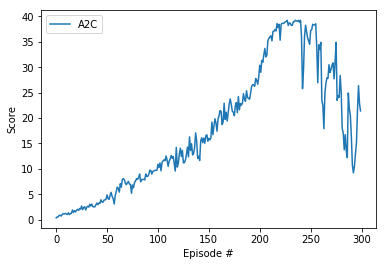

In [17]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='A2C')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()